In [1]:
import os
import warnings
import glob
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get the data directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
grandparent_dir = os.path.dirname(parent_dir)
data_dir = os.path.join(grandparent_dir, "data")
dockets_data_path = os.path.join(data_dir, "dockets/individual_csvs")
print(dockets_data_path)

/Users/eshan23/eshanprashar_git_profile/judges-conflicts/data/dockets/individual_csvs


In [3]:
# Import csvs from dockets data path
# Suppress only specific warnings, such as DtypeWarning
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

# Defining load_data function
def load_data(data_dir):
    '''
    Base approach to load data from csv files in a directory
    '''
    all_files = glob.glob(data_dir + "/*.csv")
    print(f"Found {len(all_files)} files in the directory")

    # Measure time using timeit
    start_time = timeit.default_timer()

    li = []
    for filename in all_files:
        try:
            df = pd.read_csv(filename, index_col=None, header=0, ) # Turn warnings off 
            li.append(df)
        except Exception as e:
            print(f"Error reading file {filename}: {e}")

    elapsed_time = timeit.default_timer() - start_time
    print(f"Time taken to load {len(all_files)} files using base approach: {elapsed_time:.2f} seconds")
    return pd.concat(li, axis=0, ignore_index=True)

In [4]:
# Load dockets
dockets_df = load_data(dockets_data_path)

Found 1403 files in the directory
Time taken to load 1403 files using base approach: 4.73 seconds


In [14]:
# Examine dockets dataframe
dockets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194066 entries, 0 to 194065
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   absolute_url                 194066 non-null  object 
 1   attorney                     163967 non-null  object 
 2   caseName                     194066 non-null  object 
 3   caseNameFull                 166072 non-null  object 
 4   citation                     194066 non-null  object 
 5   citeCount                    194066 non-null  int64  
 6   cluster_id                   194066 non-null  int64  
 7   court                        194066 non-null  object 
 8   court_citation_string        194066 non-null  object 
 9   court_id                     194066 non-null  object 
 10  dateArgued                   385 non-null     object 
 11  dateFiled                    194066 non-null  object 
 12  dateReargued                 0 non-null       float64
 13 

In [5]:
dockets_df.head(10).to_csv("dockets_sample.csv", index=False)

In [25]:
# Group by court and create a histogram
court_counts = dockets_df["court"].value_counts().head(30)
print(court_counts)

court
District Court, District of Columbia          25882
District Court, S.D. New York                 17637
District Court, N.D. Illinois                  8542
Court of Appeals for the Seventh Circuit       7247
District Court, E.D. Pennsylvania              5605
District Court, E.D. New York                  5491
District Court, D. Massachusetts               4979
District Court, E.D. Michigan                  3980
District Court, D. Connecticut                 3042
District Court, E.D. Virginia                  3021
District Court, D. Kansas                      2874
District Court, S.D. Florida                   2847
United States Court of International Trade     2796
District Court, D. New Jersey                  2692
District Court, D. Puerto Rico                 2574
District Court, N.D. California                2411
District Court, W.D. New York                  2397
District Court, C.D. California                2357
Supreme Court of the United States             2326
Distri

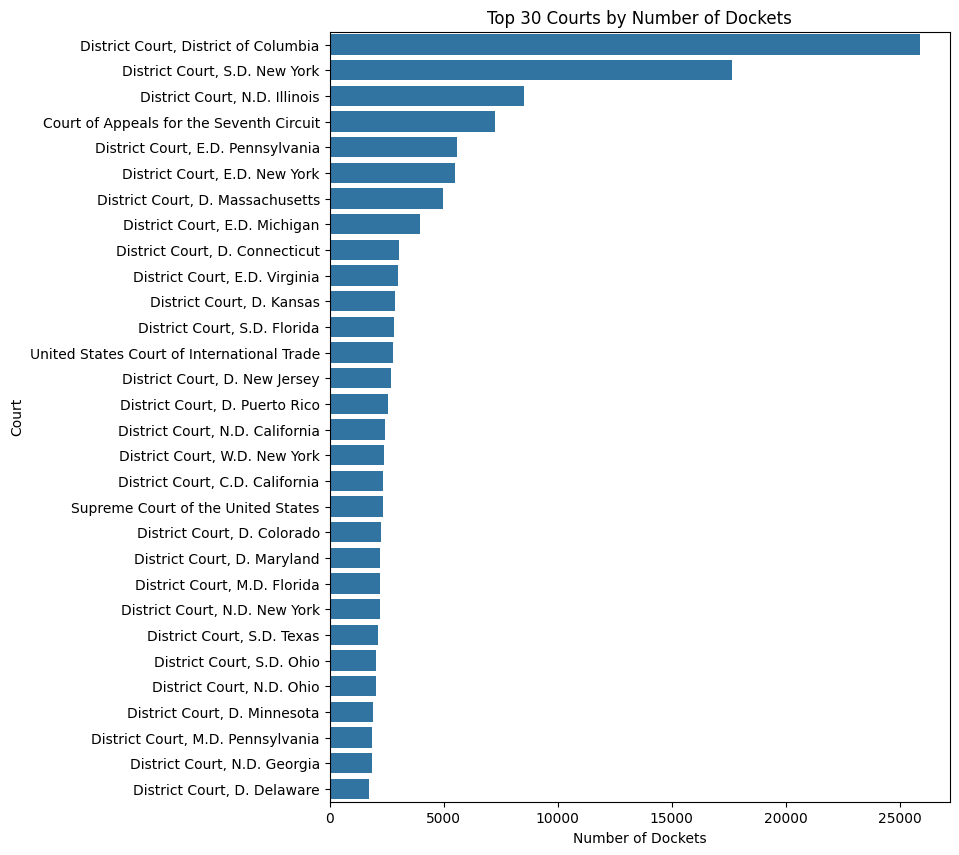

In [28]:
# Plot the histogram
plt.close("all")
plt.figure(figsize=(8,10))
sns.barplot(x=court_counts.values, y=court_counts.index)
plt.title("Top 30 Courts by Number of Dockets") 
plt.xlabel("Number of Dockets")
plt.ylabel("Court")
plt.show()

In [31]:
# Extract the year from dateFiled and plot histogram
dockets_df["dateFiled"] = pd.to_datetime(dockets_df["dateFiled"], errors="coerce")
dockets_df["date_Filed_year"] = dockets_df["dateFiled"].dt.year
year_counts = dockets_df["date_Filed_year"].value_counts().sort_index(ascending=False)
print(year_counts)

date_Filed_year
2024    1046
2023    1378
2022    1633
2021    1529
2020    2296
        ... 
1853      12
1852      20
1851      11
1850      13
1849       5
Name: count, Length: 130, dtype: int64


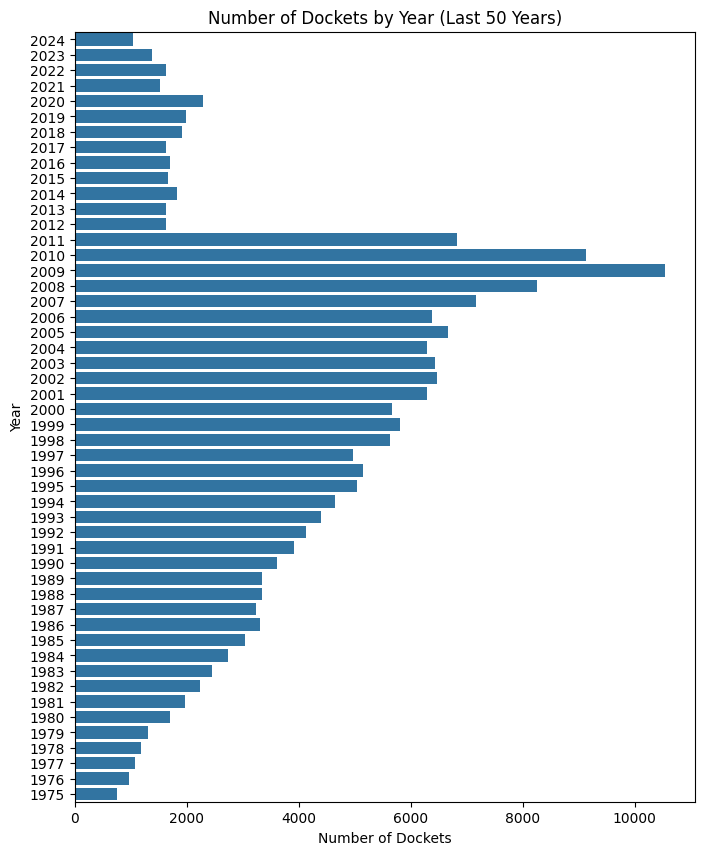

In [68]:
# Plot the histogram
year_counts_last_50_years = year_counts.head(50)

# Making year the index
year_counts_last_50_years.index = year_counts_last_50_years.index.astype(str)  # Convert the index to string to represent years

# Close previous figures and create a new one
plt.close("all")
plt.figure(figsize=(8,10))

# Create the bar plot
sns.barplot(x=year_counts_last_50_years.values, y=year_counts_last_50_years.index)

# Add labels and title
plt.title("Number of Dockets by Year (Last 50 Years)")
plt.xlabel("Number of Dockets")
plt.ylabel("Year")

# Show the plot
plt.show()

In [67]:
year_counts_last_50_years

date_Filed_year
2024     1046
2023     1378
2022     1633
2021     1529
2020     2296
2019     1983
2018     1923
2017     1636
2016     1704
2015     1672
2014     1833
2013     1631
2012     1620
2011     6819
2010     9125
2009    10543
2008     8246
2007     7158
2006     6377
2005     6665
2004     6290
2003     6431
2002     6459
2001     6291
2000     5664
1999     5809
1998     5624
1997     4972
1996     5140
1995     5047
1994     4641
1993     4404
1992     4120
1991     3908
1990     3611
1989     3337
1988     3348
1987     3235
1986     3300
1985     3045
1984     2735
1983     2448
1982     2232
1981     1967
1980     1707
1979     1303
1978     1175
1977     1082
1976      960
1975      754
Name: count, dtype: int64

In [45]:
# Calculate dockets per judge: group by judge and count dockets
dockets_per_judge = dockets_df["judge"].value_counts()
average_dockets_per_judge = dockets_per_judge.mean()
median_dockets_per_judge = dockets_per_judge.median()
print(f"Average dockets per judge: {average_dockets_per_judge:.2f}")
print(f"Median dockets per judge: {median_dockets_per_judge:.2f}")

Average dockets per judge: 22.51
Median dockets per judge: 1.00


In [46]:
dockets_per_judge.to_csv("dockets_per_judge.csv")

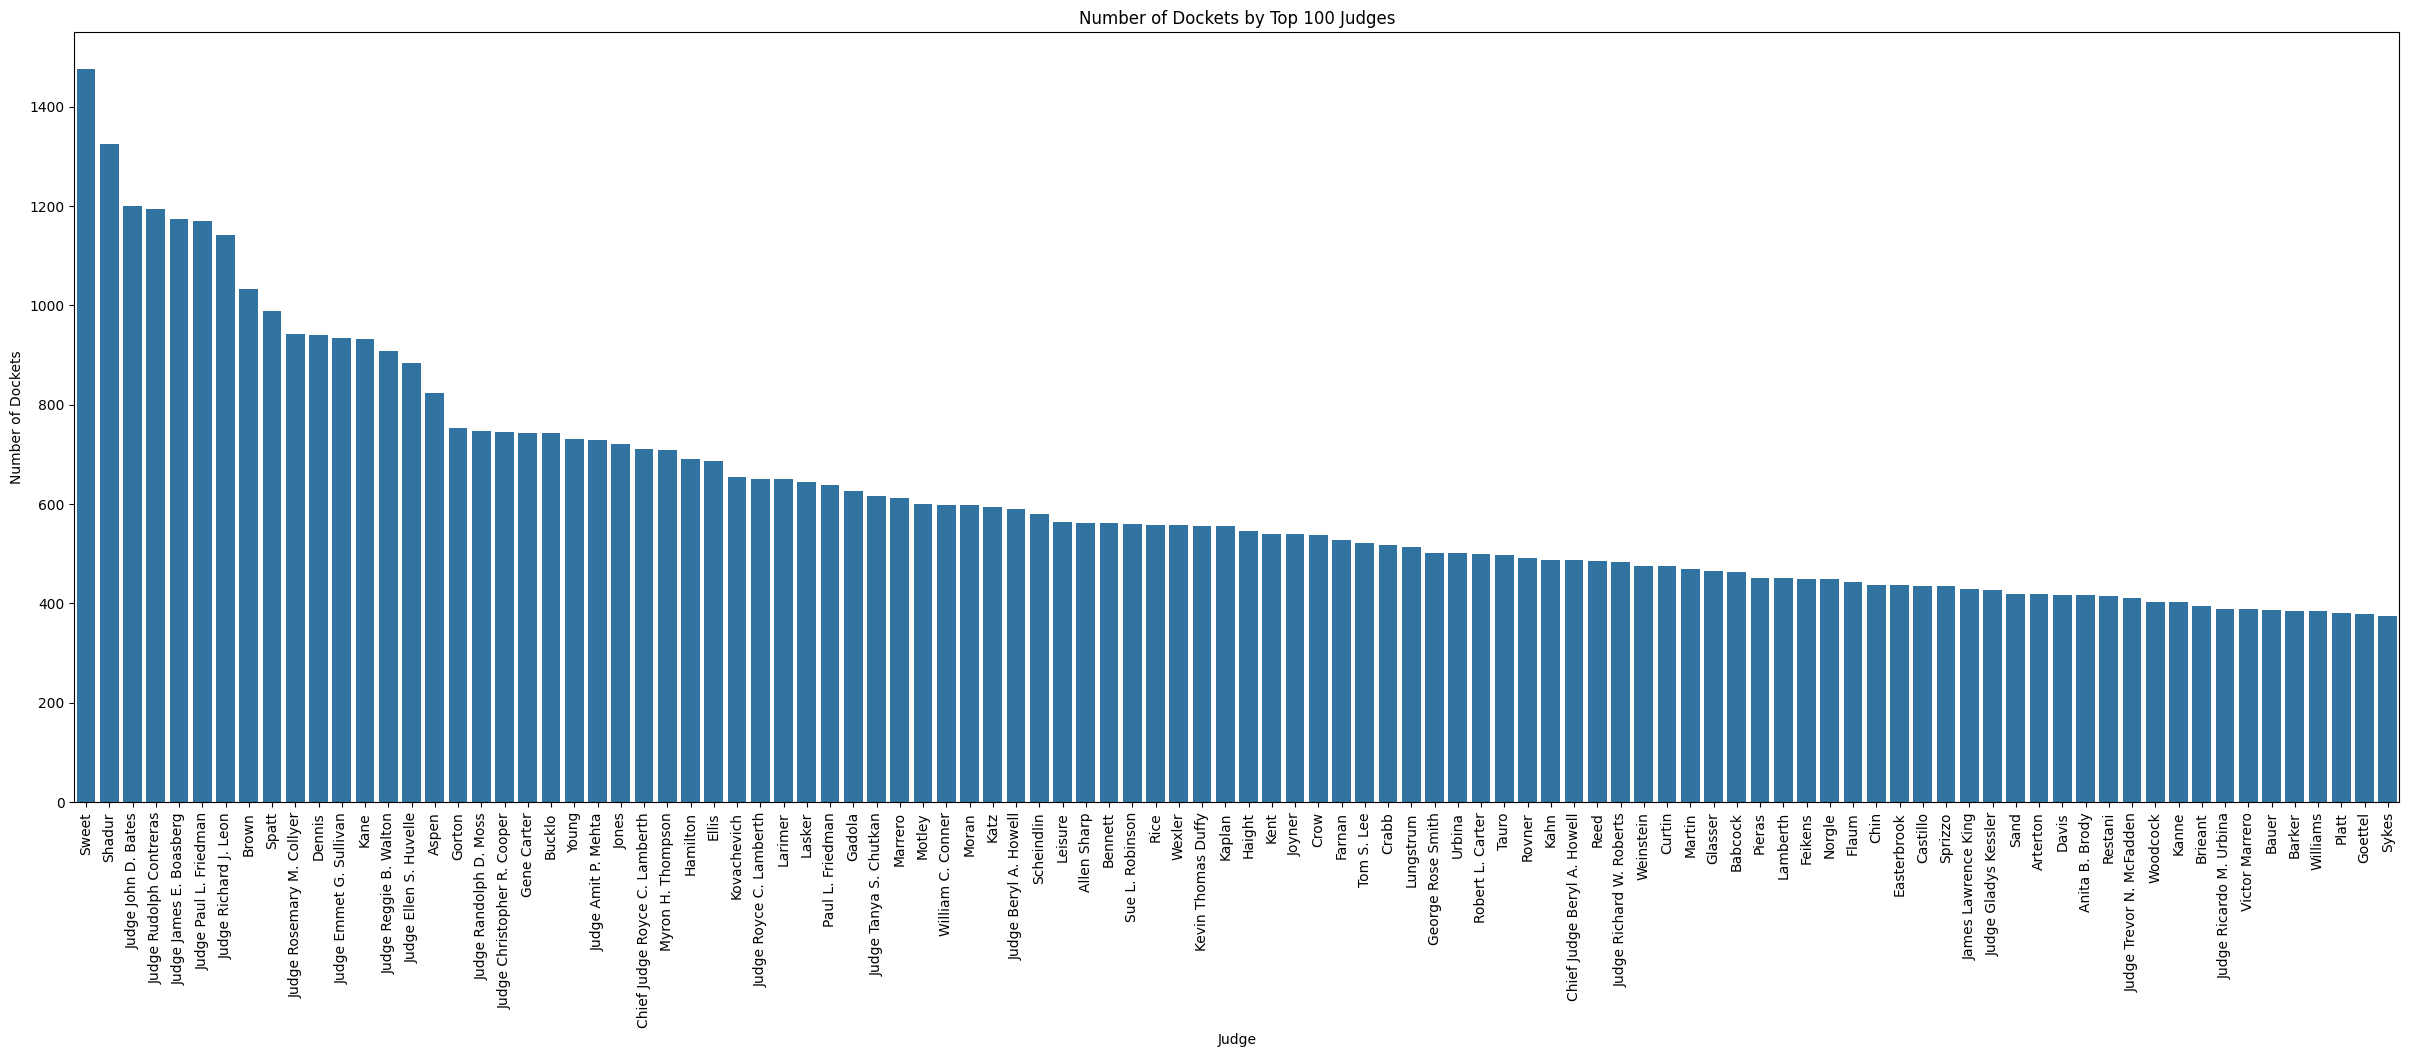

In [48]:
# Plot docket count of top 100 judges
top_100_judges = dockets_per_judge.head(100)
plt.close("all")
plt.figure(figsize=(30,10))
sns.barplot(x=top_100_judges.index, y=top_100_judges.values)
plt.title("Number of Dockets by Top 100 Judges")
plt.xlabel("Judge")
plt.ylabel("Number of Dockets")
plt.xticks(rotation=90)
plt.show()

In [53]:
import ast  # To safely evaluate string representations of lists

# Function to safely extract the 'author_id' and 'snippet' fields
def extract_author_id(opinion):
    if isinstance(opinion, str):
        # Convert string representation of list to a Python object
        opinion = ast.literal_eval(opinion)
    if isinstance(opinion, list) and len(opinion) > 0:
        return opinion[0].get('author_id', None)
    return None

def extract_snippet(opinion):
    if isinstance(opinion, str):
        # Convert string representation of list to a Python object
        opinion = ast.literal_eval(opinion)
    if isinstance(opinion, list) and len(opinion) > 0:
        return opinion[0].get('snippet', None)
    return None

# Apply the functions to extract 'author_id' and 'snippet'
dockets_df['author_id'] = dockets_df['opinions'].apply(extract_author_id)
dockets_df['snippet'] = dockets_df['opinions'].apply(extract_snippet)

In [54]:
# Take docket counts by author 
author_counts = dockets_df["author_id"].value_counts()
average_dockets_per_author = author_counts.mean()
median_dockets_per_author = author_counts.median()
print(f"Average dockets per author: {average_dockets_per_author:.2f}")
print(f"Median dockets per author: {median_dockets_per_author:.2f}")

Average dockets per author: 138.32
Median dockets per author: 70.00


In [58]:
# Create bins for docket counts
bins = [0, 5, 10, 50, 100, 250,500,750,1000,1250,1500,1750,2000,2500]
author_counts_binned = pd.cut(author_counts, bins=bins).value_counts().sort_index()
print(author_counts_binned)

count
(0, 5]          117
(5, 10]          64
(10, 50]        368
(50, 100]       312
(100, 250]      348
(250, 500]      114
(500, 750]       48
(750, 1000]      16
(1000, 1250]      4
(1250, 1500]      8
(1500, 1750]      2
(1750, 2000]      1
(2000, 2500]      1
Name: count, dtype: int64


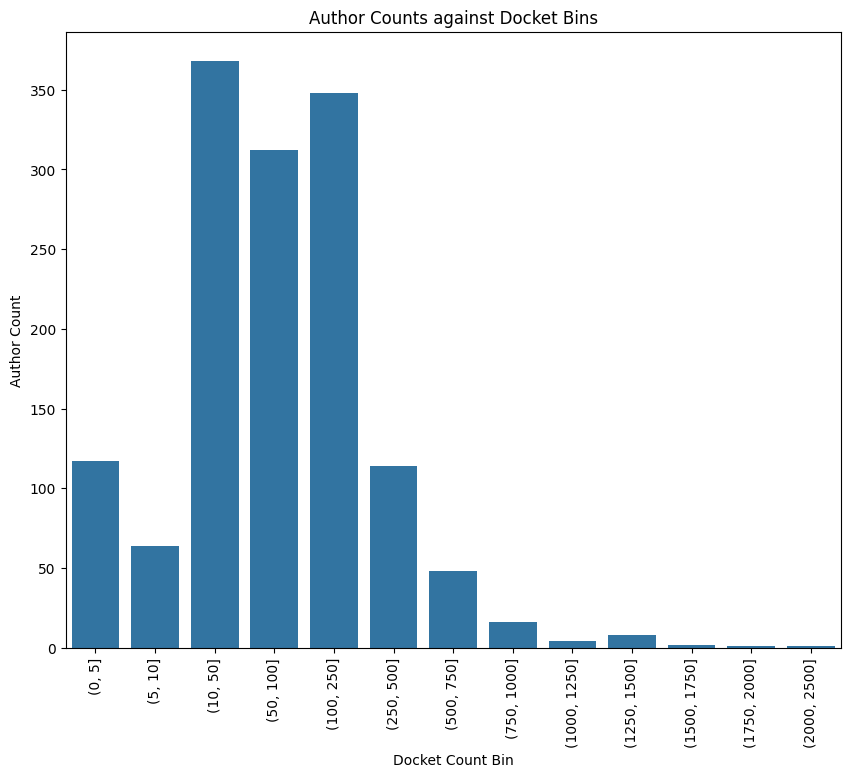

In [64]:
# Plot the histogram
plt.close("all")
plt.figure(figsize=(10,8))
sns.barplot(x=author_counts_binned.index, y=author_counts_binned.values)
plt.title("Author Counts against Docket Bins")
plt.xlabel("Docket Count Bin")
plt.ylabel("Author Count")
plt.xticks(rotation=90)
plt.show()